# **Web Scraping + Feature Engineering + Exploratory Data Analysis (EDA)**

In real life, we often don’t get clean or structured datasets. This notebook will show you:

* How to collect data by scraping content from blog-like web pages
* How to create custom features using simple NLP (Natural Language Processing) techniques
* How to explore and understand your data using EDA methods

This step-by-step process helps build a strong base for tasks like classification, clustering, text summarization, and other NLP/ML projects.



* Install required Python **libraries**

   !pip install requests beautifulsoup4 lxml pandas spacy matplotlib seaborn textblob

* Download spaCy English model

   !python -m spacy download en_core_web_sm

* Reinstall seaborn and textblob to avoid missing dependencies

   !pip install seaborn

   !pip install textblob


In [8]:
# Import required libraries
import pandas as pd
import time

# Dataset path
dataset_path = "Tweets.csv"
print(f"Loading dataset from: {dataset_path}")

# Load the dataset
try:
    start = time.time()

    df_raw = pd.read_csv(dataset_path)

    # Display basic info
    print(f"Loaded {len(df_raw)} rows.")
    print(f"Columns: {list(df_raw.columns)}")

    # Select only useful columns for sentiment classification
    df = df_raw[['text', 'airline_sentiment']].copy()

    # Drop missing/empty rows
    df.dropna(subset=['text', 'airline_sentiment'], inplace=True)

    end = time.time()
    print(f"Cleaned dataset shape: {df.shape}")
    print(f"Load and clean time: {round(end - start, 2)} seconds")

except Exception as e:
    print(f"[ERROR] Failed to load dataset -> {e}")

# Preview
df.head()


Loading dataset from: Tweets.csv
Loaded 14640 rows.
Columns: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']
Cleaned dataset shape: (14640, 2)
Load and clean time: 0.31 seconds


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [9]:
import spacy
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define function to extract linguistic features
def extract_features(text):
    doc = nlp(text)
    return pd.Series({
        'num_tokens': len(doc),
        'num_sentences': len(list(doc.sents)),
        'num_entities': len(doc.ents),
        'num_nouns': len([t for t in doc if t.pos_ == 'NOUN'])
    })

# Check and apply only if dataset is not empty
if not df.empty:
    features = df['text'].apply(extract_features)
    df = pd.concat([df, features], axis=1)
else:
    print("No tweet data found.")


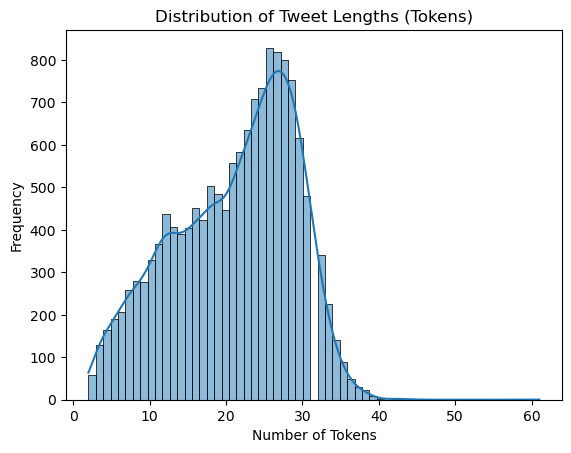

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    sns.histplot(df['num_tokens'], kde=True)
    plt.title("Distribution of Tweet Lengths (Tokens)")
    plt.xlabel("Number of Tokens")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No tweet data available to plot.")


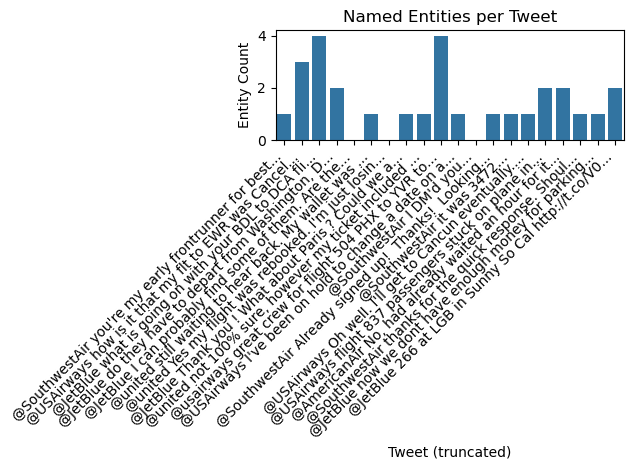

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    # Take a small sample (e.g., 20 tweets) for readability
    sample_df = df[['text', 'num_entities']].sample(20, random_state=42).copy()
    sample_df['short_text'] = sample_df['text'].str.slice(0, 50) + "..."  # Truncate tweet text

    sns.barplot(x='short_text', y='num_entities', data=sample_df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Named Entities per Tweet")
    plt.ylabel("Entity Count")
    plt.xlabel("Tweet (truncated)")
    plt.tight_layout()
    plt.show()
else:
    print("No tweet data available to plot.")


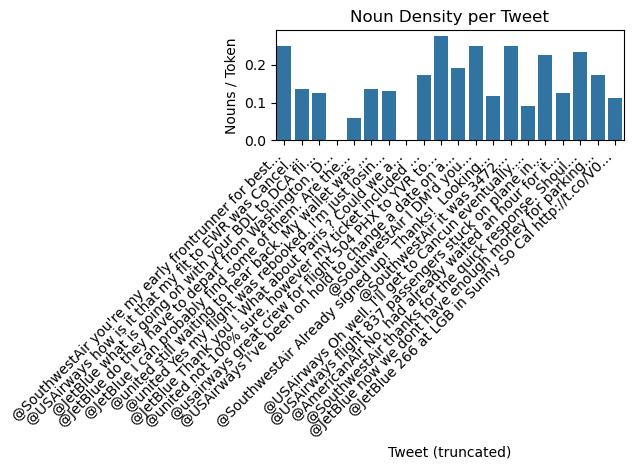

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty:
    # Calculate noun density
    df['noun_density'] = df['num_nouns'] / df['num_tokens']

    # Take a sample of tweets for clearer visualization
    sample_df = df[['text', 'noun_density']].sample(20, random_state=42).copy()
    sample_df['short_text'] = sample_df['text'].str.slice(0, 50) + "..."

    sns.barplot(x='short_text', y='noun_density', data=sample_df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Noun Density per Tweet")
    plt.ylabel("Nouns / Token")
    plt.xlabel("Tweet (truncated)")
    plt.tight_layout()
    plt.show()
else:
    print("No tweet data available to plot.")


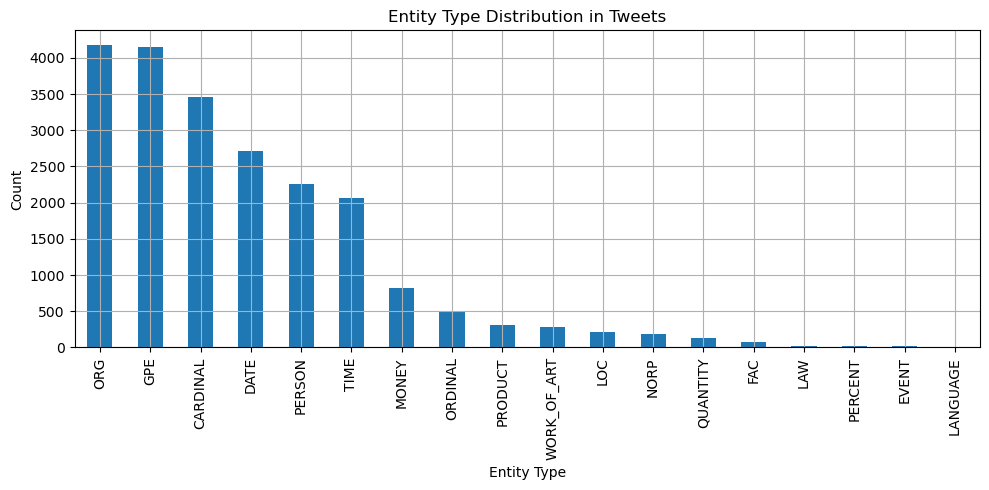

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

all_entities = []

# Extract named entity labels from each tweet
for text in df['text']:
    doc = nlp(text)
    all_entities.extend([ent.label_ for ent in doc.ents if ent.label_])

# Count the frequency of each entity type
entity_counts = Counter(all_entities)

# Create DataFrame from the counts
entity_df = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['count'])
entity_df = entity_df.sort_values('count', ascending=False)

# Plot the distribution
if not entity_df.empty:
    entity_df.plot(kind='bar', figsize=(10, 5), legend=False)
    plt.title("Entity Type Distribution in Tweets")
    plt.ylabel("Count")
    plt.xlabel("Entity Type")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No entities found.")


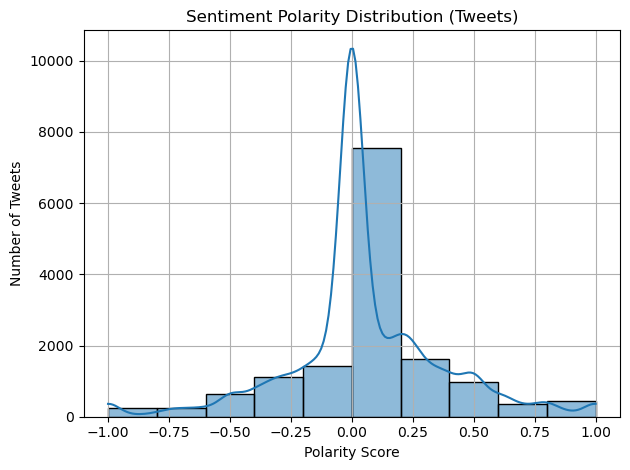

In [14]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate sentiment polarity for each tweet
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot histogram of sentiment scores
sns.histplot(df['sentiment'], bins=10, kde=True)
plt.title("Sentiment Polarity Distribution (Tweets)")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
df[['text', 'num_tokens', 'num_sentences', 'num_entities', 'num_nouns', 'noun_density', 'sentiment']].head()


,text,num_tokens,num_sentences,num_entities,num_nouns,noun_density,sentiment
0,@VirginAmerica What @dhepburn said.,5,1,0,0,0.000000,0.000000
1,@VirginAmerica plus you've added commercials t...,12,1,0,2,0.166667,0.000000
2,@VirginAmerica I didn't today... Must mean I n...,15,2,1,2,0.133333,-0.390625
3,@VirginAmerica it's really aggressive to blast...,23,1,0,4,0.173913,0.006250
4,@VirginAmerica and it's a really big bad thing...,11,1,0,1,0.090909,-0.350000


* pip install scikit-learn 

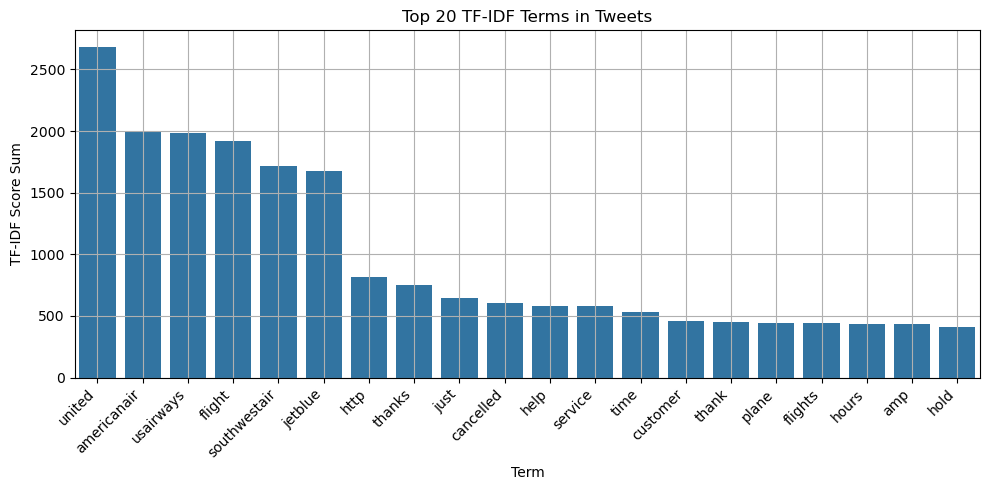

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Use cleaned text if available; otherwise use raw text
text_column = 'clean_text' if 'clean_text' in df.columns else 'text'

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df[text_column])

# Create DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum scores for each term
tfidf_sums = tfidf_df.sum().sort_values(ascending=False)

# Plot the top terms
plt.figure(figsize=(10, 5))
sns.barplot(x=tfidf_sums.index, y=tfidf_sums.values)
plt.title("Top 20 TF-IDF Terms in Tweets")
plt.ylabel("TF-IDF Score Sum")
plt.xlabel("Term")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
